# **Olympics Data Analysis**

Olympics Data Analysis means studying past Olympic records to understand how athletes, countries, and sports have performed over time. It helps find patterns such as:


1.  Medal Trends

*  Which countries win the most medals
*  How medal counts change year by year
*  Which sports give the most medals


2. Athlete Performance


*   Top athletes with the highest medals
*   Gender-wise participation
*   Performance trends across different years and sports


3.   Sport Insights

*  Most popular or competitive sports
*  Sports where certain countries dominate
*  Growth of new sports over time

4. Country Comparisons


*  Top-performing nations
*   Country-wise strengths in specific sports
*   Medal dominance by continent or region


# **Imports**

In [43]:

!pip install -q seaborn scikit-learn
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
sns.set(style="whitegrid", palette="muted", context="notebook")
pd.set_option('display.max_columns', None)

# **Load & Upload CSV File**

In [44]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
filename = next(iter(uploaded))
df = pd.read_csv(filename, encoding='latin1')
print("File Loaded:", filename)
print("Rows, Cols:", df.shape)
df.head()


Saving Summer-Olympic-medals-1976-to-2008.csv to Summer-Olympic-medals-1976-to-2008.csv
File Loaded: Summer-Olympic-medals-1976-to-2008.csv
Rows, Cols: (15433, 11)


,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [45]:

print("Column names:", df.columns.tolist())
print("\nNull counts:\n", df.isnull().sum())
for c in ['Event_gender', 'Country_Code']:
    if c in df.columns:
        df = df.drop(columns=[c])
str_cols = df.select_dtypes(include='object').columns
for c in str_cols:
    df[c] = df[c].astype(str).str.strip()
if 'Year' in df.columns:
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')
df = df.dropna(how='all')
print("\nAfter cleaning: Rows,Cols:", df.shape)
df.info()


Column names: ['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender', 'Country_Code', 'Country', 'Event_gender', 'Medal']

Null counts:
 City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

After cleaning: Rows,Cols: (15433, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        15433 non-null  object
 1   Year        15316 non-null  Int64 
 2   Sport       15433 non-null  object
 3   Discipline  15433 non-null  object
 4   Event       15433 non-null  object
 5   Athlete     15433 non-null  object
 6   Gender      15433 non-null  object
 7   Country     15433 non-null  object
 8   Medal       15433 non-null  object
dtypes: Int64(1), object(8)
m

# **Basic exploratory summary**

In [46]:

print("Unique Sports:", df['Sport'].nunique())
print("Unique Events:", df['Event'].nunique())
print("Years range:", df['Year'].min(), "-", df['Year'].max())

Unique Sports: 29
Unique Events: 294
Years range: 1976 - 2008


# **Top countries by medal-count**

In [47]:

top_countries = df['Country'].value_counts().head(15)
print("\nTop countries (by rows/medal holders):")
print(top_countries)


Top countries (by rows/medal holders):
Country
United States     1992
Soviet Union      1021
Australia          798
Germany            691
China              679
Russia             638
East Germany       626
Italy              486
Romania            482
United Kingdom     467
Korea, South       454
France             449
Netherlands        428
Japan              388
Hungary            368
Name: count, dtype: int64


# **Top athletes**


In [48]:

top_athletes = df['Athlete'].value_counts().head(15)
print("\nTop athletes (most medal entries):")
print(top_athletes)



Top athletes (most medal entries):
Athlete
nan                       117
PHELPS, Michael            16
TORRES, Dara               12
THOMPSON, Jenny            12
NEMOV, Alexei              12
ANDRIANOV, Nikolay         12
FISCHER, Birgit            12
BIONDI, Matthew            11
COUGHLIN, Natalie          11
VAN ALMSICK, Franziska     10
LEWIS, Carl                10
DITYATIN, Aleksandr        10
HALL, Gary Jr.             10
SCHERBO, Vitaly            10
COMANECI, Nadia             9
Name: count, dtype: int64


# **Medals per Year**


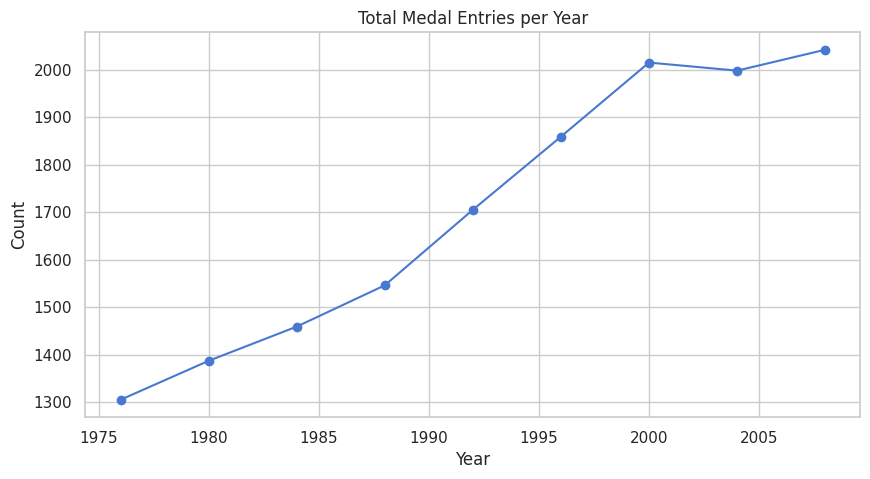

In [49]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
medals_by_year = df.groupby('Year').size()
medals_by_year.plot(marker='o')
plt.title("Total Medal Entries per Year")
plt.ylabel("Count")
plt.xlabel("Year")
plt.grid(True)
plt.show()


# **Top 15 Countries**

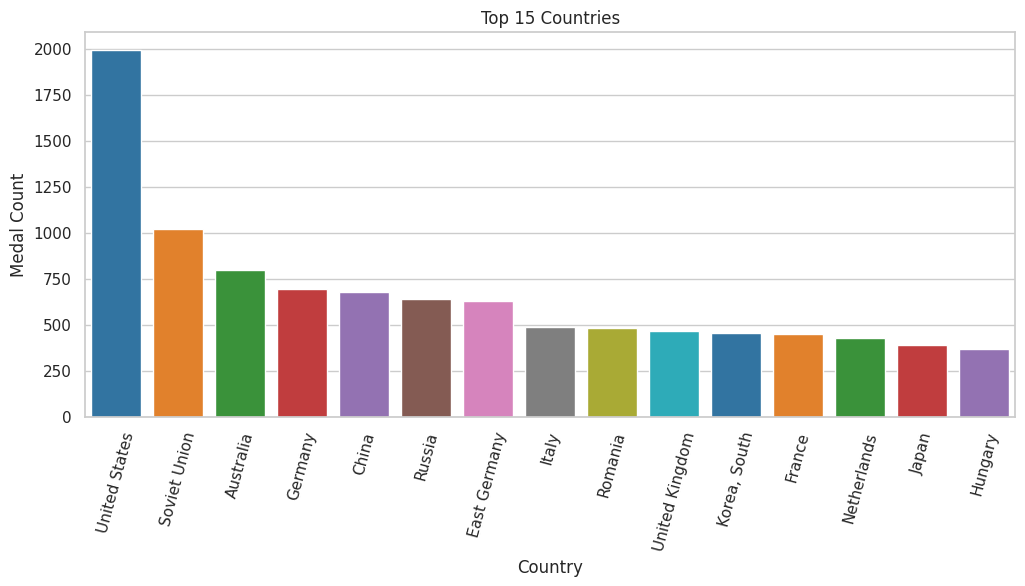

In [50]:

top_countries = df['Country'].value_counts().head(15)
plt.figure(figsize=(12,5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='tab10')
plt.xticks(rotation=75)
plt.title("Top 15 Countries")
plt.ylabel("Medal Count")
plt.xlabel("Country")
plt.show()

# **Gender Distribution**


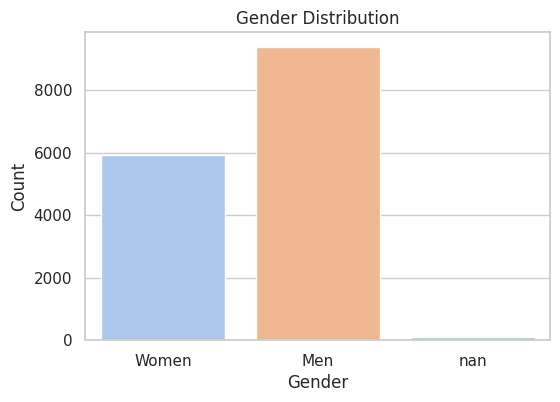

In [51]:

if 'Gender' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='Gender', palette='pastel')
    plt.title("Gender Distribution")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.show()
else:
    print("Column 'Gender' not found in dataset.")

# **Year–Country Pivot Table**


In [52]:

if set(['Year','Country','Medal']).issubset(df.columns):
    temp = df.groupby(['Year','Country','Medal']).size().reset_index(name='Count')
    pivot = temp.pivot_table(
        index=['Year','Country'],
        columns='Medal',
        values='Count',
        fill_value=0
    )
    pivot['Total'] = pivot.sum(axis=1)
    pivot = pivot.reset_index()
    display(pivot.sort_values(['Year','Total'], ascending=[True, False]).head(20))
else:
    print("Columns Year, Country, Medal are missing.")

Medal,Year,Country,Bronze,Gold,Silver,Total
30,1976,Soviet Union,79.0,113.0,93.0,285.0
10,1976,East Germany,42.0,99.0,51.0,192.0
37,1976,United States,36.0,63.0,56.0,155.0
39,1976,West Germany,30.0,21.0,24.0,75.0
26,1976,Poland,26.0,18.0,29.0,73.0
13,1976,Hungary,35.0,14.0,6.0,55.0
29,1976,Romania,23.0,4.0,28.0,55.0
17,1976,Japan,10.0,25.0,6.0,41.0
5,1976,Bulgaria,18.0,8.0,13.0,39.0
36,1976,United Kingdom,11.0,6.0,15.0,32.0


# **Athlete Medal Distribution by Sport**


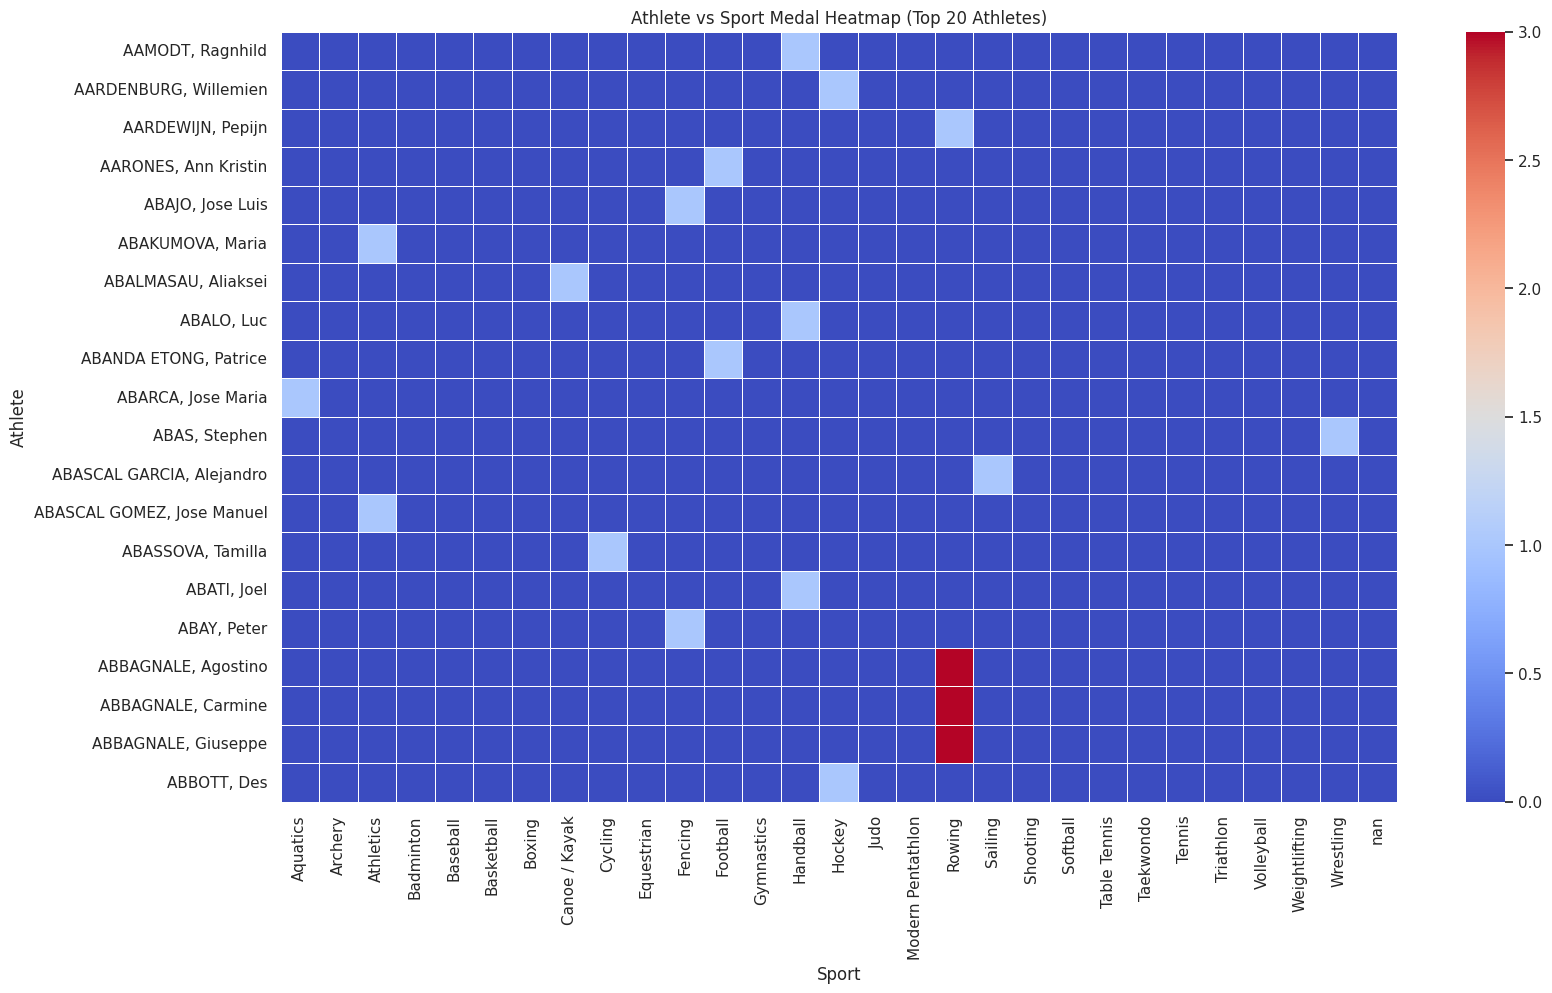

In [53]:
athlete_sport = df.pivot_table(
    index='Athlete',
    columns='Sport',
    values='Medal',
    aggfunc='count',
    fill_value=0
)
plt.figure(figsize=(18,10))
sns.heatmap(athlete_sport.head(20), cmap="coolwarm", linewidths=.5)
plt.title("Athlete vs Sport Medal Heatmap (Top 20 Athletes)")
plt.show()


# **Medal Type Distribution Across Sports**

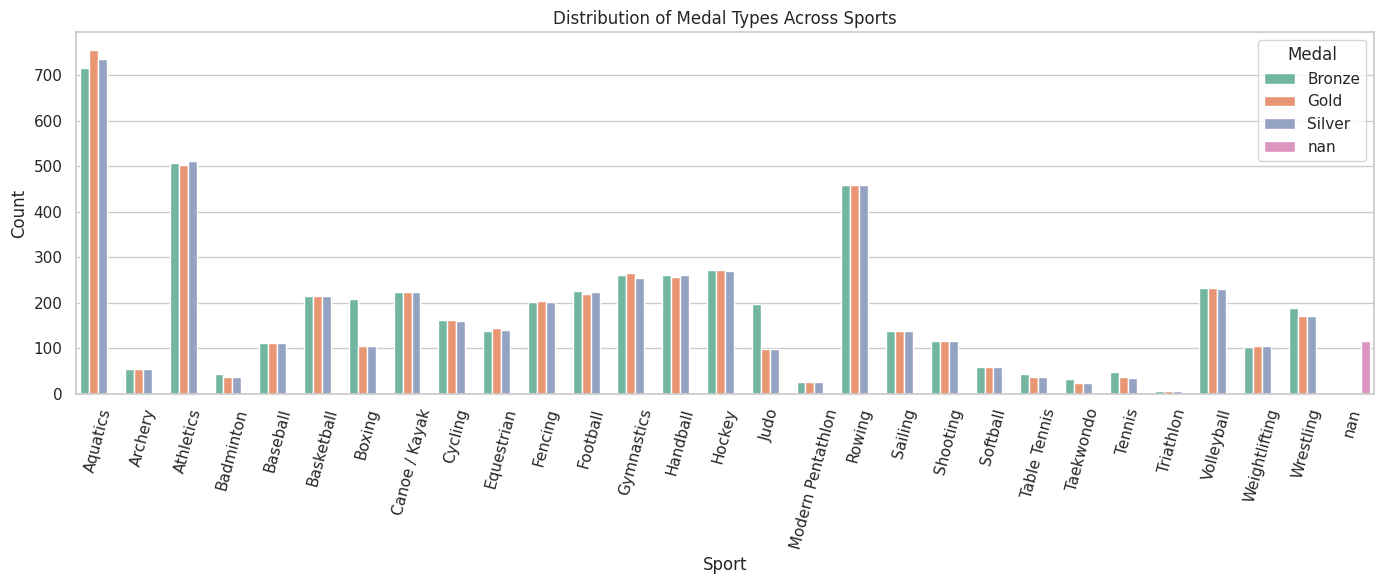

In [54]:

plt.figure(figsize=(14,6))

medal_sport = df.groupby(['Sport','Medal']).size().reset_index(name='Count')

sns.barplot(data=medal_sport, x='Sport', y='Count', hue='Medal', palette="Set2")
plt.xticks(rotation=75)
plt.title("Distribution of Medal Types Across Sports")
plt.tight_layout()
plt.show()

# **Country-by-Sport Heatmap**


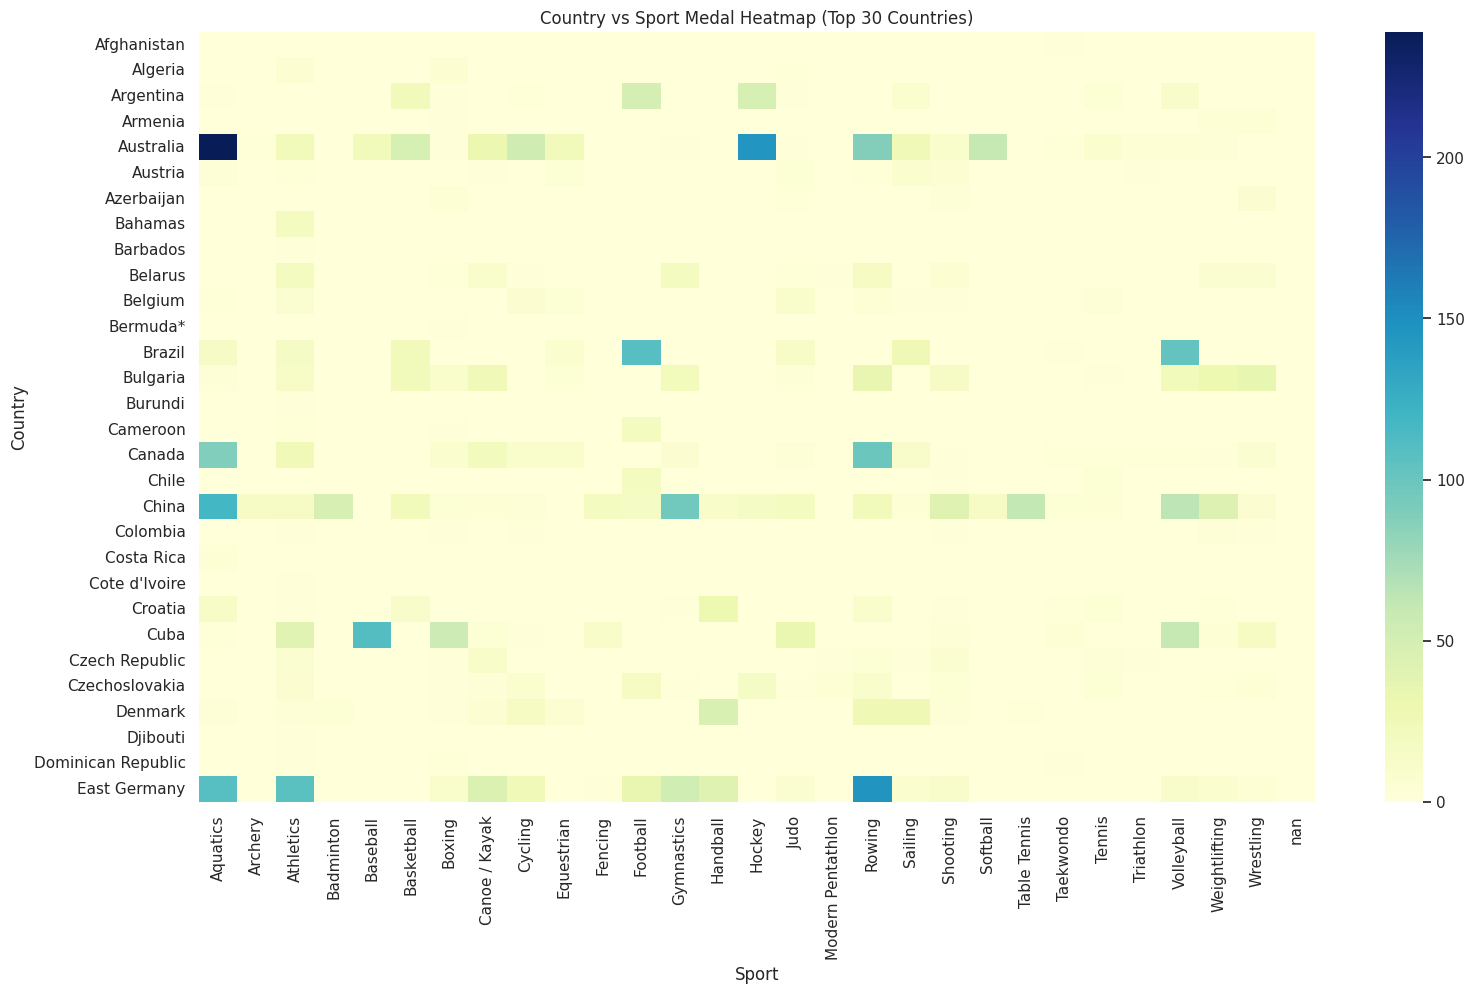

In [55]:

country_sport = df.pivot_table(
    index='Country',
    columns='Sport',
    values='Medal',
    aggfunc='count',
    fill_value=0
)
plt.figure(figsize=(18,10))
sns.heatmap(country_sport.head(30), cmap="YlGnBu")
plt.title("Country vs Sport Medal Heatmap (Top 30 Countries)")
plt.show()


# **Sport-wise Medal Count**


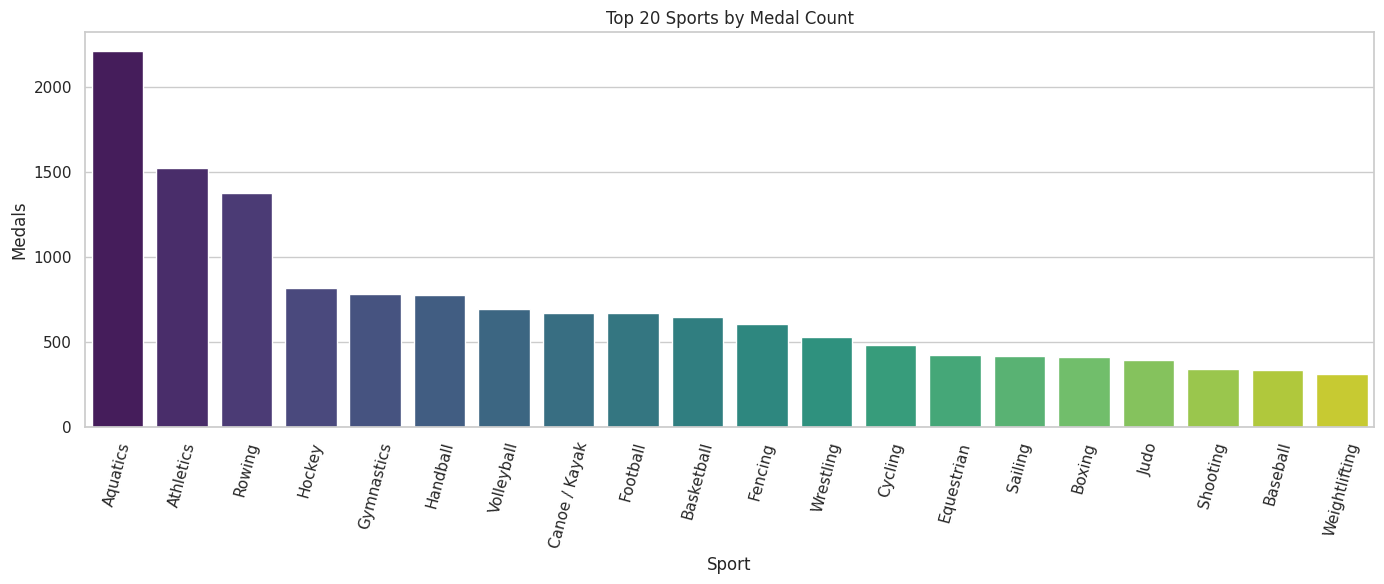

In [56]:

plt.figure(figsize=(14,6))
sport_counts = df['Sport'].value_counts().head(20)
sns.barplot(x=sport_counts.index, y=sport_counts.values, palette="viridis")
plt.xticks(rotation=75)
plt.title("Top 20 Sports by Medal Count")
plt.xlabel("Sport")
plt.ylabel("Medals")
plt.tight_layout()
plt.show()

# **Sport-wise Medal Trend Over Years**


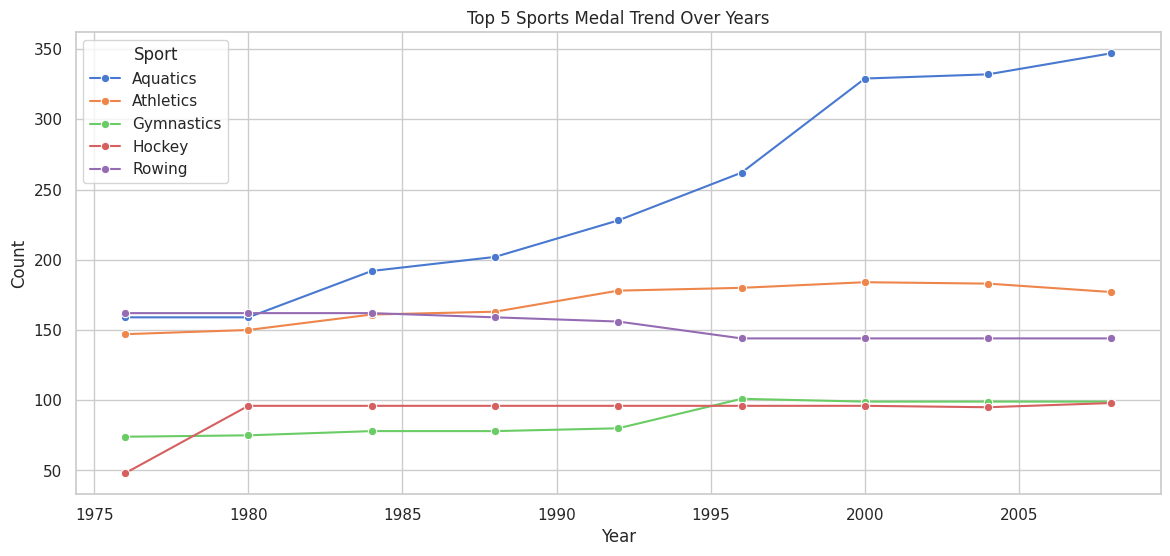

In [57]:
plt.figure(figsize=(14,6))
sport_year = df.groupby(['Year','Sport']).size().reset_index(name='Count')
top_sports = df['Sport'].value_counts().head(5).index
sport_year_top = sport_year[sport_year['Sport'].isin(top_sports)]
sns.lineplot(data=sport_year_top, x='Year', y='Count', hue='Sport', marker='o')
plt.title("Top 5 Sports Medal Trend Over Years")
plt.grid(True)
plt.show()


# **Medal Type Share**


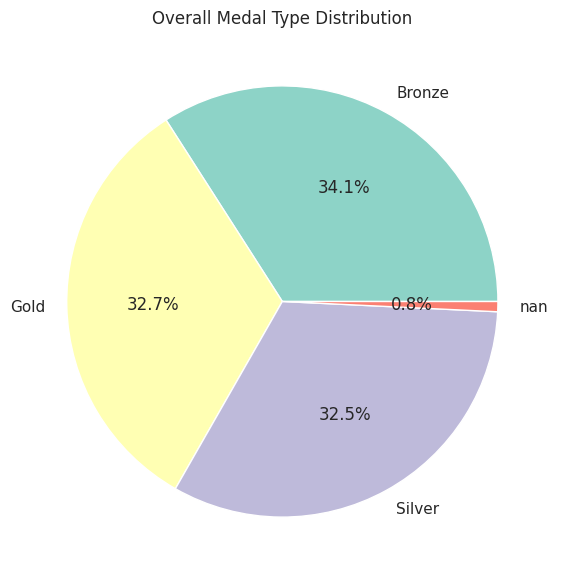

In [58]:

if 'Medal' in df.columns:
    plt.figure(figsize=(7,7))
    medal_counts = df['Medal'].value_counts()
    plt.pie(medal_counts, labels=medal_counts.index, autopct='%1.1f%%',
            colors=sns.color_palette('Set3'))
    plt.title("Overall Medal Type Distribution")
    plt.show()
else:
    print("Column 'Medal' not found.")

# **Heatmap of Medals Across Year**s


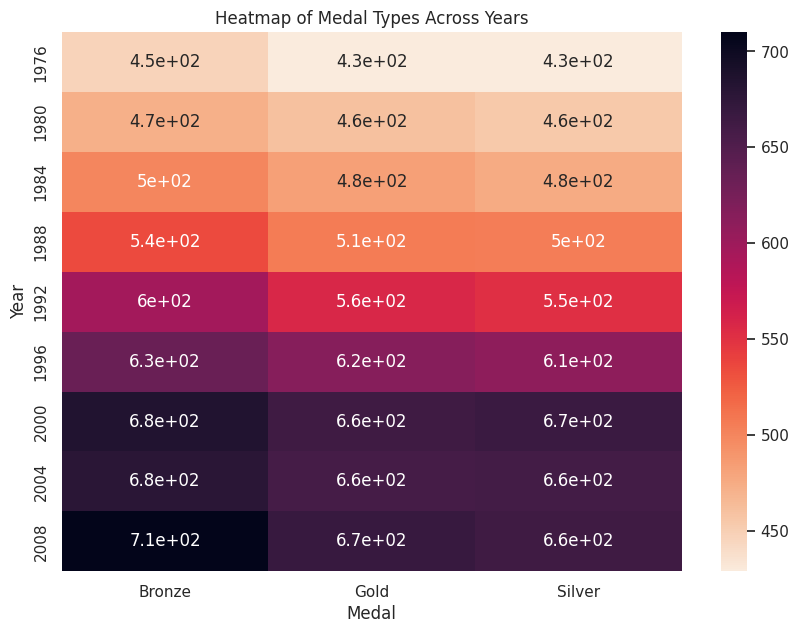

In [59]:

if set(['Year','Medal']).issubset(df.columns):
    year_medal = df.pivot_table(
        index='Year',
        columns='Medal',
        values='Athlete',  # any column → counting medals
        aggfunc='count',
        fill_value=0
    )
    plt.figure(figsize=(10,7))
    sns.heatmap(year_medal, annot=True, cmap="rocket_r")
    plt.title("Heatmap of Medal Types Across Years")
    plt.ylabel("Year")
    plt.show()
else:
    print("Columns 'Year' or 'Medal' missing!")